# Problem Set 1 (61 points)

## Important information
1.  We provide signatures of the functions that you have to implement. Make sure you follow the signatures defined, otherwise your coding solutions will not be graded.

2.  Please submit the single Jupyter Notebook file, where only Python and Markdown/$\\LaTeX$ are used. Any hand-written solutions inserted by photos or in any other way **are prohibitive and will not be graded**. If you will have any questions about using Markdown, ask them!
3.  The works will be checked for **plagiarism**. The score will be divided by the number of similar works.

# Problem 1 (18 pts)

### Problem 1.0 (Matrix norms) (8 pts)

1. For any norm $\|\cdot\|$ in finite dimentional space $\mathbb{C}^{N}$ we define dual norm $\|x\|^{'} = \sup\left\{\left|y^{\star} x\right|:\left\|y\right\|=1\right\}$, where ${\cdot}^{\star}$ denotes transpose complex-conjugate vector.

+ (2 pts). Prove that $\|\cdot\|^{'}$ is a norm.

+ (2 pts). Find dual norms for Chebyshev norm $\left\|x\right\|_{\infty} = \max\limits_{i=1,\dots, N}|x_{i}|$ and $l_1$ norm $\left\|x\right\|_1 = \sum\limits_{i=1}^{N}|x_{i}|$.

+ (2 pts). Find dual norm for $l_p$ norm $\left\|x\right\|_{p} = \left(\sum\limits_{i=1}^{N}|x_{i}|^{p}\right)^{1/p}$.

+ (2 pts). Find dual norm for weighted norm $\left\|x\right\|_{A} = \left(x^T A x\right)^{1/2}$ with positive-definite matrix $A$ and $x\in\mathbb{R}^{N}$.

### Problem 1.1 (Matrix norms) (10 pts)

1. Let $U \in \mathbb{R}^{n \times r}$ be an $n \times r$ matrix with orthonormal columns $U^{\top} U = I_r$. Let $V$ be an $m \times r$ matrix. 

+ (2 pts). Propose an algorithm for the computation of $\Vert A \Vert^2_F$, where $A = U V^{\top}$, and estimate its complexity with respect to $n, m, r$. How orthogonalization can be used? 

+ (3 pts). Consider the matrix $B = A \circ A$, where $\circ$ is the elementwise product of matrices (i.e., the elements of the matrix $B$ are squares of the elements of the matrix $A$). What is the maximal possible rank of the matrix $B$? 

+ (5 pts). Propose an algorithm for the computation of $\Vert B \Vert^2_F$ and estimate its complexity with respect to $n, m, r$.

### Problem 1.2 (Unitary and orthogonal matrices) (4 pts)

+ (2 pts). Let $O\in\mathbb{R}^{n\times n}$ be orthogonal matrix. Characterise explicitly all orthogonal matrices that are positive definite. You may start with $n=2$.

+ (2 pts). Show that any unitary matrix from $\mathbb{C}^{n\times n}$ can be represented as a product of at most $n$ Householder reflectors.

# Problem 2 (15 pts)

1. We define approximate $\epsilon-$rank of matrix $A$ as $\text{rank}_{\epsilon}A = \min \left\{\text{rank}(X): \left\|A-X\right\|_{\max}\leq \epsilon\right\}$.

  
+ (6 pts). Let $f(x, y),\,x,y\in[0, 1]$ is analytic function with $\left.\partial_y^{(k)}f(x, y)\right|_{y=0}\leq M$ for all $k$. Show that approximate rank of matrix $A_{ij} = f(x_i, y_j)$ where $x_{i},\,i=1,\dots,p$, $y_{j},\,j=1,\dots,q$ are arbitrary points inside $[0, 1]^2$, is bounded independent of $p$, $q$ and the choice of points.

+ (6 pts). Extend result from the previous point (a.) to $x, y \in \mathbb{R}^{N}$. Observe how the bound depends on $N$.

+ (3 pts). Demonstarate your bounds from two previous points numerically on functions

    + (1 pts). $\cos(xy)$, $\exp(-(x-y)^2)$ and a few on your choice for $N=1$
    + (1 pts). [RBF kernel](https://scikit-learn.org/stable/modules/gaussian_process.html#radial-basis-function-rbf-kernel) for different $N$.
    + (1 pts). [Exp-Sine-Squared kernel](https://scikit-learn.org/stable/modules/gaussian_process.html#exp-sine-squared-kernel) for different $N$.


# Problem 3 (Molecules) (16 pts)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

We have in our posession a database with molecules. Each molecule has five atoms `A`, `B`, `C`, `D`, `E` located in the same plane $x, y$.

The coordinates of the molecules was collected by an automatic system that processed "pictures" from the electronic microscope. As a result, some of the samples differs by unkonwn rotation in $2D$ space. Your task is to normalize this database to find distinct molecules.

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/oseledets/nla2022/main/hw1/molecules.csv", index_col=0)
data.head()

,A_x,A_y,B_x,B_y,C_x,C_y,D_x,D_y,E_x,E_y
sample,,,,,,,,,,
0,0.0,0.0,-0.568099,-0.822960,0.411480,-0.284050,-0.983627,-0.180214,-0.180214,0.983627
1,0.0,0.0,-0.816462,0.577399,0.288700,0.408231,-0.169043,0.985609,0.169043,-0.985609
2,0.0,0.0,-0.999628,-0.027283,0.013642,-0.499814,-0.726136,0.687551,0.687551,0.726136
3,0.0,0.0,0.946140,0.323758,-0.161879,0.473070,-0.897953,0.440091,-0.440091,-0.897953
4,0.0,0.0,-0.901767,0.432222,-0.216111,-0.450884,0.332018,-0.943273,0.943273,0.332018


In [ ]:
molecules = data.to_numpy().reshape(len(data), 5, 2)
molecules.shape

(500, 5, 2)

In [ ]:
def draw_molecule(ax, molecule):
    ax.scatter(*molecule.T, color="black", s=50)
    for i in range(1, molecule.shape[0]):
        ax.plot(*molecule[[0, i], :].T, color="black")
    ax.axis("off")
    ax.axis("equal")

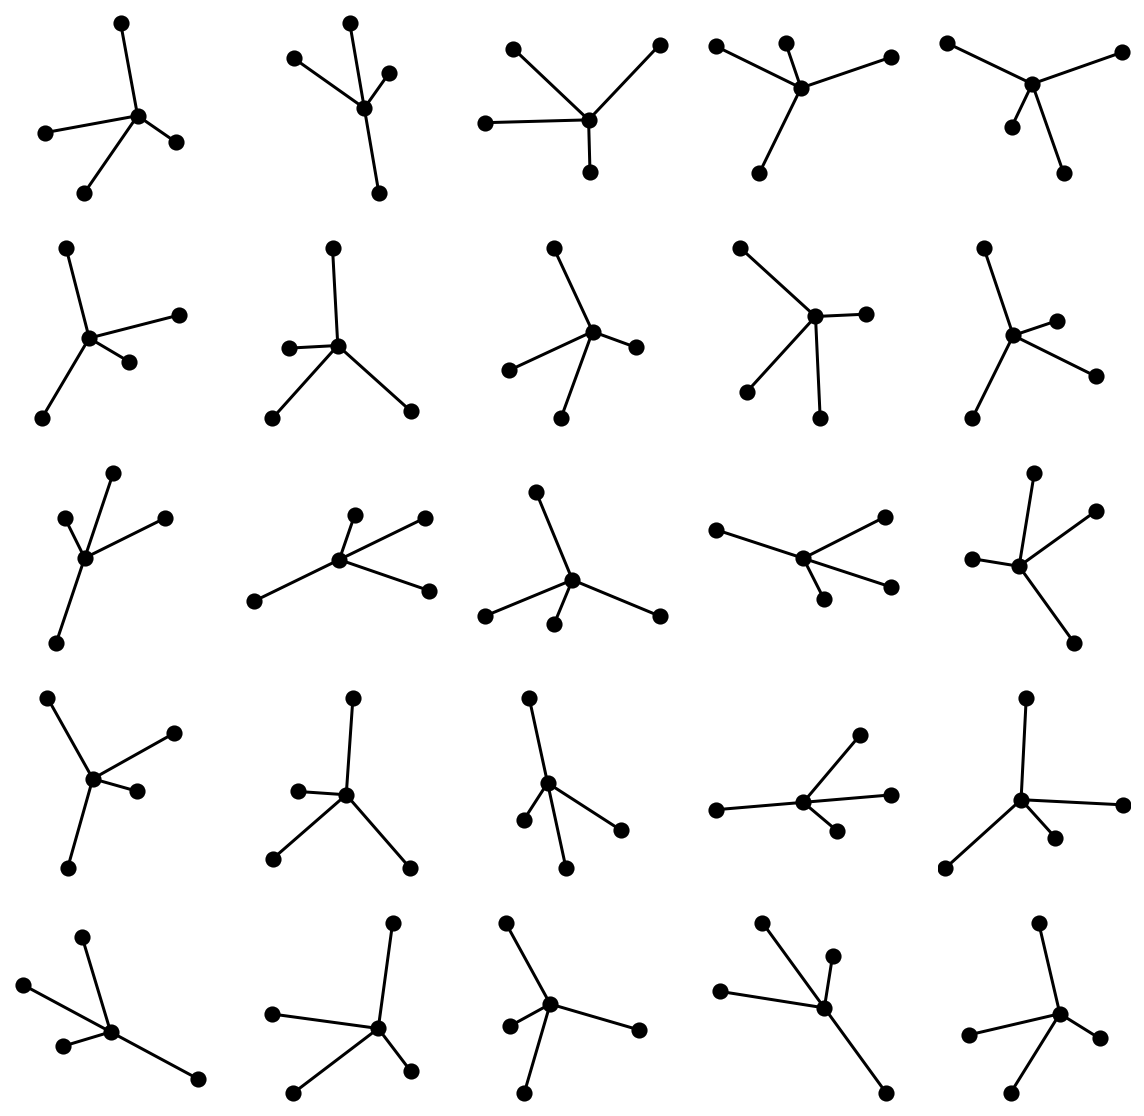

In [ ]:
k = 5
fig, ax = plt.subplots(k, k, figsize=(2*k, 2*k))
ax = ax.reshape(-1,)
for i in range(k**2):
    draw_molecule(ax[i], molecules[i])

## What you should do: 

+ (2 pts). Prove that orthogonal transformations preserve $l_2$ norm, i.e., $\left\|x\right\|_2 = \left\|Ux\right\|_2$, where $U$ is an orthogonal matrix.


In [ ]:
#your solution


+ (4 pts). Use the result from the previous point to construct an algorithm that distinguishes different molecules. Implement it and run on the database. Produce a list of distinct molecules and visualise them.

In [ ]:
#your solution

+ (7 pts). Learn about [Kabsch algorithm](https://en.wikipedia.org/wiki/Kabsch_algorithm). Implement it and run on the database. Produce a list of distinct molecules and visualise them.

In [ ]:
#your solution

+ (3 pts). Compare results of algorithm from 2. and from 3. Explain the difference.

In [ ]:
#your solution

# Problem 4 (Disentangled representation) (12 pts)

## Brief intro

The main component of [GAN](https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html) is Generator network. Generator is such model that takes as input random vector and produces an image. In this task, we will work with the already pre-trained generator $G$. Here are a few things you need to know about this model:



1.   **Model input:** batch of random vectors $z\sim N(0,1)$ with normally distributed values of size **(Batch_Size,100)**. Here, Batch_Size is a number of images we want to generate
2.   **Model output:** $\mathrm{images} = G(z)$ - batch of images with size **(Batch_Size,3,64,64)**. Here **3** - defines number of image channels (3 for RGB images), **64, 64** - width and height.
3.   **Model structure:** generator is a set of sequentially appplied functions. Each function input is the output of the previous one. In other words, $G(z) = f_N(f_{N-1}...f_1(f_0(z)))$. $N$ - defines number of functions in generator.



### Disentanglement

The good property of GAN is that generator input space has a set of meaningful directions - moving input vector along this directions produce interpretable changes in image. For example, we can change a Pose, Age, Expression or even add eyeglasses. You can read more about it on [resource](https://genforce.github.io/interfacegan/). The main question is how to find such good directions. This problem is called disentanglement.

![](https://github.com/genforce/interfacegan/blob/master/docs/assets/teaser.jpg?raw=true)

## Problem discription 

We are going to find meaningful directions using SVD applied over the Jacobian matrix of some hidden output with respect to model input. **i-th** hidden output of generator model is defined by formula $G_{i}(z) = f_i(f_{i-1}...f_1(f_0(z))))$, where $i < N$. So, the task could be splitted on four main parts:

1. **(4 pts)**   Write the function **Get_Hidden_Output**, which reproduces formula $G_{i}(z) = f_i(f_{i-1}...f_1(f_0(z))))$
2. **(3 pts)**   Calculate jacobian matrix $J$ of generator $G$ for several **i** values. For each of them:

*   Calculate the jacobian matrix with respect to $z$: $\frac{\partial G(z)}{\partial z}$
*   Reshape jacobian matrix to have the size **(Batch_Size * Hidden_Output_Size,100)**

3. **(3 pts)**  Apply SVD to jacobian matrix ($J = U @ S @ V.T$) from previous step

4. **(2 pts)**  Take several directions from matrix $V$ (particular columns), and run visualization code (already written for you). Leave a comment on what you got (how found directions affect image)

**Attention!!!**

1.  Please run the code on google colab to fulfil packages requirements
2.  Jacobian matrix computation may take more than 20 minutes!
3.  Use GPU runtime to accelerate computations

## Prerequisites

In [ ]:
!pip install functorch

In [ ]:
import torch
from torch import nn
import requests
import matplotlib.pyplot as plt
import numpy as np
from torchvision import utils as vutils
from torchvision import transforms
from tqdm import tqdm
from google.colab import files
from functorch import vmap, jacfwd, jacrev
from functorch.experimental import replace_all_batch_norm_modules_

In [ ]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
#   hidden generator size
ngf = 64

# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
nz = 100

print(f"Device: {device}, latent size {nz}, generator hidden dim {ngf}, number of image channels {nc}")

In [ ]:
def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

In [ ]:
class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )
    def get_function_output(self, inp, index=0):
      if index == 0:
        inp = inp[:,:,None,None]
      return self.main[index](inp)
    def get_number_of_layers(self):
      return len(self.main)

    def forward(self, input):
        return self.main(input[:,:,None,None])

In [ ]:
file_id = "1hIh2-8KjcUku1Dl-mLYqEObbODrCW_Fp"
destination = './G_checkpoint.pt'
download_file_from_google_drive(file_id, destination)
G = Generator(1).to(device)
G.load_state_dict(torch.load('./G_checkpoint.pt', map_location="cpu"))
replace_all_batch_norm_modules_(G)

In [ ]:
def sample_batch(batch_size):
  return torch.randn((batch_size,nz),device=device)

In [ ]:
def ToPILImage(tensor):
  return transforms.ToPILImage()(tensor)

In [ ]:
def ConvertTensorsToOne(tensor, nrow=None):
  if nrow is None:
    nrow = int(tensor.size(0) ** 0.5)
  return vutils.make_grid(tensor, padding=2, normalize=True, nrow=nrow).cpu()

## Generator network visualization

In [ ]:
# generator model consist of 14 functions numbered from 0 to 13

G

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)

In [ ]:
# sample 64 random vectors to produce 64 images

z = sample_batch(64)

z.shape

torch.Size([64, 100])

In [ ]:
# producing images

out = G(z)

out.shape

torch.Size([64, 3, 64, 64])

In [ ]:
# generate hidden output for given input (remember that functions are applied sequentially - input should be the output of previous function)
# index defines which function output will be returned
# for function with index 0 input will be model input "z"

hidden_output = G.get_function_output(z,index=0)

hidden_output.shape

torch.Size([64, 512, 4, 4])

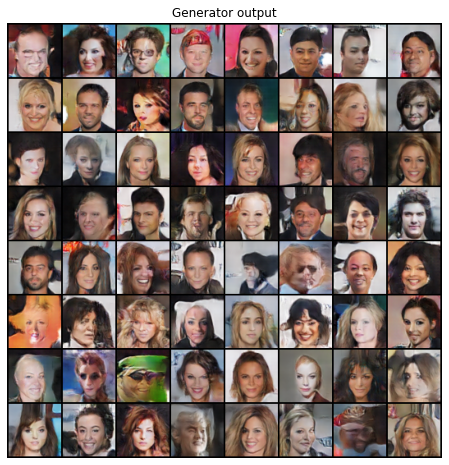

In [ ]:
# plotting the images by combining them into one, with 8 images in each row (nrow=8)

plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Generator output")
plt.imshow(ToPILImage(ConvertTensorsToOne(out, nrow=8)))

## Perform experiments

**Define the function that returns the output of any generator function for given input z and generator function index (4 pts)**

In [ ]:
def Get_Hidden_Output(z,index):
  # your solution
  out = # your solution
  return out

**Define the function that calculates the jacobian matrix based on given input z and generator function index (use the function which you implemented earlier) (3 pts)**

In [ ]:
def Calc_Gradient(z, index):
  grads = # your solution
  return grads

In [ ]:
index = # your solution
z = sample_batch(20)
grads = Calc_Gradient(z,index)

**Calculate SVD and visualize singular values for several generator function indexes (2-3 indexes are enough). Based on singular value plots, decide what generator function is more useful for disentangled representation search and why, leave a comment.(3 pts)**

In [ ]:
U, S, V = # your solution
# your solution

**Choose some directions from matrix V (some columns) corresponding to chosen generator function index (based on previous step). Run visualization code. Which image attributes affects chosen directions? (2 pts)**

In [ ]:
def make_edit(input, dirs):
  output = G(input)
  input_shift = input[:,None,:] + dirs[None,:,:]*3
  output_shift = G(input_shift.reshape(-1,nz)).reshape(input.size(0),-1,3,64,64)
  return torch.cat([output[:,None],output_shift],dim=1).reshape(-1,3,64,64)

In [ ]:
input = sample_batch(4)
dirs = # your solution, number of directions should be the first dimension

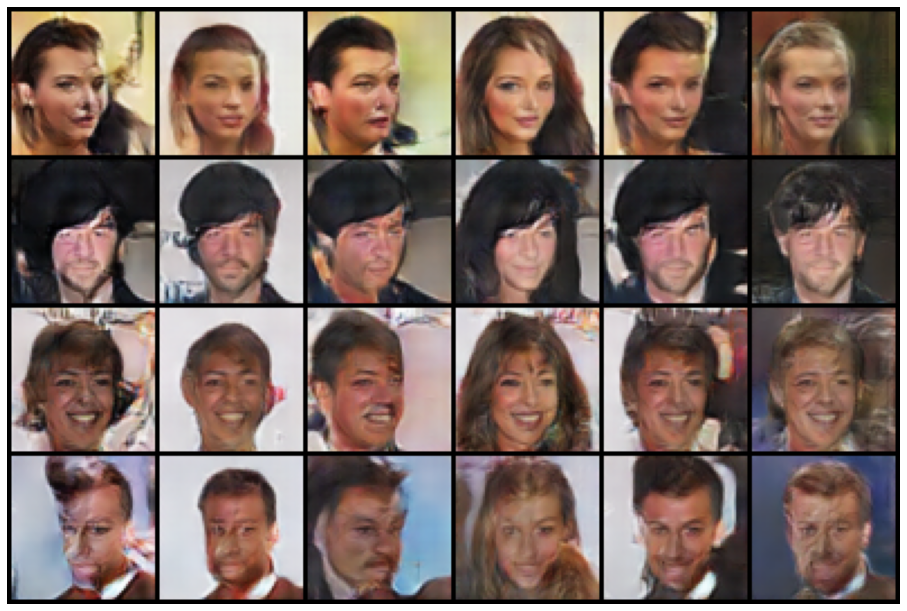

In [ ]:
out = make_edit(input, dirs)
plt.figure(figsize=(16,16))
plt.axis("off")
plt.imshow(ToPILImage(ConvertTensorsToOne(out, nrow=(dirs.size(0)+1))))